<a href="https://colab.research.google.com/github/Kanchanasud/My-Performance/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_DMPM_data')

!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/drive/MyDrive/bsc_DMPM_data


#Dataset
https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset

##Data Description
- Response (target) - 1 หากลูกค้ายอมรับข้อเสนอในแคมเปญล่าสุด 0 อย่างอื่น
- ID - รหัส ID ที่ไม่ซ้ำกันของลูกค้าแต่ละคน
- Year_Birth - อายุของลูกค้า
- Complain - 1 หากลูกค้าร้องเรียนในช่วง 2 ปีที่ผ่านมา 0 อย่างอื่น
- Dt_Customer - วันที่ลงทะเบียนของลูกค้ากับบริษัท
- Education - ระดับการศึกษาของลูกค้า
- Marital - สถานภาพการสมรสของลูกค้า
- Kidhome - จำนวนเด็กแต่ละคนในครัวเรือนของลูกค้า
- Teenhome - จำนวนวัยรุ่นแต่ละคนในครัวเรือนของลูกค้า
- Income - รายได้รายปีของลูกค้า 
- MntFishProducts - จำนวนเงินที่ใช้สำหรับซื้อสินค้าปลาในช่วง 2 ปีที่ผ่านมา
- MntMeatProducts - จำนวนเงินที่ใช้สำหรับซื้อเนื้อสัตว์ในช่วง 2 ปีที่ผ่านมา
- MntFruits - จำนวนเงินที่ใช้สำหรับซื้อผลไม้ในช่วง 2 ปีที่ผ่านมา
- MntSweetProducts - จำนวนเงินที่ใช้สำหรับซื้อขนมหวานในช่วง 2 ปีที่ผ่านมา
- MntWines - จำนวนเงินที่ใช้สำหรับซื้อไวน์ในช่วง 2 ปีที่ผ่านมา
- MntGoldProds - จำนวนเงินที่ใช้สำหรับซื้อผลิตภัณฑ์ทองคำในช่วง 2 ปีที่ผ่านมา
- NumDealsPurchases - จำนวนการซื้อสินค้าที่มีส่วนลด
- NumCatalogPurchases - จำนวนการซื้อสินค้าผ่านแคตตาล็อก (การซื้อสินค้าที่จะส่งผ่านไปรษณีย์)
- NumStorePurchases - จำนวนการซื้อสินค้าโดยตรงที่ร้านค้า
- NumWebPurchases - จำนวนการซื้อสินค้าผ่านเว็บไซต์ของบริษัท
- NumWebVisitsMonth - จำนวนการเข้าชมเว็บไซต์ของบริษัทในเดือนล่าสุด
- Recency - จำนวนวันตั้งแต่การซื้อสินค้าครั้งล่าสุด

#Data Cleaning

In [ ]:
#open CSV file 
import pandas as pd

In [ ]:
superstore_data = pd.read_csv('superstore_data.csv')
print(superstore_data.shape) #  shown number of (row, column)
superstore_data.head()

(2240, 22)


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


#Data Cleaning

In [ ]:
superstore_data.columns #check columns

##Missing/Null Checking

In [ ]:
superstore_data.isnull().any() #check missing , True = NaN , False = Not NaN

Id                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Response               False
Complain               False
dtype: bool

In [ ]:
superstore_data.dtypes #check data type

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [ ]:
# ' Income ' เรียกเฉพาะคอลัมน์เพื่อดูค่า NaN
superstore_data[superstore_data['Income'].isnull()]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
134,8996,1957,PhD,Married,NaN,2,1,11/19/2012,4,230,...,49,37,53,12,7,2,8,9,0,0
262,1994,1983,Graduation,Married,NaN,1,0,11/15/2013,11,5,...,0,2,1,1,1,0,2,7,0,0
394,3769,1972,PhD,Together,NaN,1,0,2/3/2014,17,25,...,0,0,3,1,1,0,3,7,0,0
449,5255,1986,Graduation,Single,NaN,1,0,2/20/2013,19,5,...,3,263,362,0,27,0,0,1,0,0
525,8268,1961,PhD,Married,NaN,0,1,11/7/2013,23,352,...,10,0,15,3,6,1,7,6,0,0
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/2012,25,25,...,17,4,17,3,3,0,3,8,0,0
899,10475,1970,Master,Together,NaN,0,1,1/4/2013,39,187,...,26,20,14,2,4,2,6,5,0,0
997,9235,1957,Graduation,Single,NaN,1,1,5/27/2014,45,7,...,2,0,1,1,1,0,2,7,0,0
1096,4345,1964,2n Cycle,Single,NaN,1,1,12/1/2014,49,5,...,2,0,4,1,1,0,2,7,0,0
1185,7187,1969,Master,Together,NaN,1,1,5/18/2013,52,375,...,94,66,96,7,4,10,4,3,0,0


In [ ]:
# คำนวณค่าเฉลี่ยของข้อมูลที่มีอยู่แล้วในช่อง income  
income_mean =  round(superstore_data['Income'].mean()) #เป็นฟังก์ชันที่ใช้สำหรับปัดเศษทศนิยมของตัวเลข เพื่อให้เหมาะสมกับรูปแบบที่ต้องการ 
# แทนค่าว่างด้วยค่าเฉลี่ย
superstore_data['Income'].fillna(income_mean, inplace=True)

In [ ]:
superstore_data_clean = superstore_data #สร้างตัวแปรใหม่มารองรับ
superstore_data_clean.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
superstore_data_clean.isnull().any() #check missing

Id                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Response               False
Complain               False
dtype: bool

In [ ]:
superstore_data_clean.dtypes #check data type

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

#k-means clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

##ข้อที่ 1 เลือกเฉพาะคอลัมน์ Income เพื่อจะแบ่งรายได้ตามกลุ่มและวางกลยุทธ์การขายให้เข้ากับลูกค้าแต่ละกลุ่มตามช่วงรายได้

(Select only the Income column to divide your income into segments and tailor your sales strategy to each customer segment based on their income range.)

In [ ]:
#ดึงข้อมูลออกจากตัวแปร superstore_data_clean แล้วเลือกเฉพาะคอลัมน์ "Income"
income = superstore_data_clean['Income'].values.reshape(-1,1) 
#-1 เป็นการกำหนดให้แกนแรกมีขนาดเท่ากับจำนวนแถวของข้อมูล Income และแกนที่สองมีขนาดเป็น 1 ในเพื่อเป็นการแปลง array 1 มิติ 
#ให้อยู่ในรูปแบบของ array 2 มิติ และใช้เพื่อเตรียมข้อมูลสำหรับการใช้ในการสร้างโมเดล Machine Learning 
#หรือการวิเคราะห์ข้อมูลต่างๆ ที่ต้องการใช้ข้อมูลในรูปแบบนี้เป็นหลัก
income

array([[84835.],
       [57091.],
       [67267.],
       ...,
       [46310.],
       [65819.],
       [94871.]])

###การหาจำนวน Cluster ที่เหมาะสมโดยใช้ วิธี Elbow Method 

(Finding the optimal cluster number using the Elbow Method.)

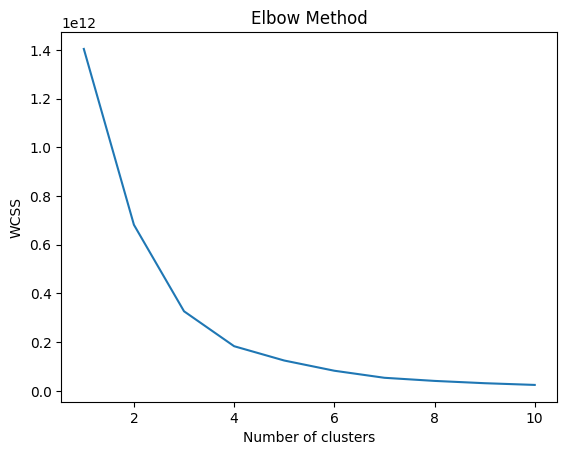

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#ทำการหาจำนวน Cluster ที่เหมาะสมโดยใช้วิธี Elbow Method เพราะ เป็นเทคนิคที่ใช้ในการหาจำนวนกลุ่มที่เหมาะสมในการจัดกลุ่มข้อมูล 
#clustering โดยใช้ค่า WCSS (Within Cluster Sum of Squares) 
# ซึ่งเป็นค่าผลรวมของระยะห่างระหว่างจุดในกลุ่มนั้นๆ เทียบกับจำนวนกลุ่มในวิธีทำ Elbow Method 

wcss = []  #ใช้ในการเลือกจำนวนกลุ่มที่เหมาะสมในการแบ่งกลุ่มโดยดูจากค่าที่  โดยจะเลือกจำนวนกลุ่มที่ทำให้ wcss มีค่าน้อยที่สุดเท่าที่เป็นไปได้
for i in range(1, 11): #ใช้ range(1, 11) เพราะต้องการแบ่งกลุ่มข้อมูลที่จะทำการทดสอบจำนวน 10 กลุ่ม 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(income) #.fit ใช้ในการสร้างโมเดล โดยใช้ข้อมูล income เพื่อ หากลุ่มของลูกค้าที่มีรายได้ใกล้เคียงกันได้
    wcss.append(kmeans.inertia_) #.inertia_นำมาใช้ในการเก็บค่า SSE ของแต่ละจำนวนของกลุ่มที่กำหนด
#ด้วยการใช้คำสั่ง kmeans.inertia_ ในการคำนวณค่า SSE และนำค่า SSE นี้ไปเก็บไว้ในลิสต์ชื่อ wcss
#สร้างกราฟเพื่อดู Curve ว่าพองตัวอยู่ในจำนวนไหนมากสุด เพื่อที่จะได้แบ่งกลุ่มได้ถูก
plt.plot(range(1, 11), wcss) #สร้างกราฟจากค่า SSE ที่เก็บไว้ในตัวแปร WCSS
plt.title('Elbow Method') #กำหนดชื่อ กราฟเป็น Elbow Method 
plt.xlabel('Number of clusters') #การกำหนดชื่อแกน X ของกราฟ เป็น Number of clusters
plt.ylabel('WCSS') #การกำหนดชื่อแกน Y ของกราฟ เป็น WCSS ซึ่งเป็นผลรวมของระยะห่างระหว่างจุดในกลุ่มนั้นๆ 
plt.show() #แสดงกราฟ

###แบ่งออกเป็น 3 กลุ่ม

(divided into 3 groups)

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42) #init='k-means++' คือวิธีการที่เลือกจุดศูนย์กลางโดยจะเลือกแต่ละกลุ่มมาคำนวณใหม่ในแต่ละรอบของการจัดกลุ่ม
#โดยใช้ค่าเฉลี่ยของจุดทั้งหมดในกลุ่มนั้นๆ เพื่อมาเป็นจุดศูนย์กลางใหม่
kmeans.fit(income) #.fit ใช้ในการสร้างโมเดล โดยใช้ข้อมูล income เพื่อ หากลุ่มของลูกค้าที่มีรายได้ใกล้เคียงกันได้

KMeans(n_clusters=3, random_state=42)

##วนลูปช่วงรายได้สำหรับแต่ละคลัสเตอร์ 3 กลุ่ม

(Loop revenue range for each of the 3 clusters.)

Cluster 1 income range: 23727.56-46337.26
Cluster 2 income range: 57553.91-83275.10
Cluster 3 income range: 666666.00-666666.00


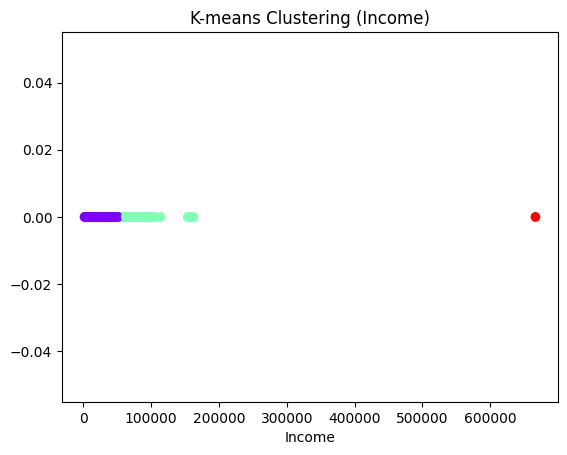

In [ ]:
# คำนวนค่าเฉลี่ยรายได้
income_means = []
for i in range(3):
    income_means.append(np.mean(income[kmeans.labels_ == i]))  #การแบ่งกลุ่มของข้อมูลรายได้ (income) ออกเป็น 3 กลุ่ม โดยใช้ loop for เพื่อหาค่าเฉลี่ยของแต่ละกลุ่ม แล้วเก็บค่านั้นไว้ใน list ชื่อ income_means

# แสดงผลช่วงรายได้สำหรับแต่ละคลัสเตอร์
for i in range(3):
    print("Cluster {} income range: {:.2f}-{:.2f}".format(i+1, income_means[i]-np.std(income[kmeans.labels_ == i]), income_means[i]+np.std(income[kmeans.labels_ == i])))

# Visualize clusters using scatter plot
plt.scatter(income, np.zeros_like(income), c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Income')
plt.title('K-means Clustering (Income)')
plt.show()

###อธิบายผลลัพธ์ 
จากการทำ K-means Clustering ของข้อมูล Superstore Marketing Campaign Dataset แบ่งกลุ่มรายได้ลูกค้า เพราะ จะได้รู้ว่ากลุ่มลูกค้ารายได้แต่ละกลุ่มลูกค้าอยู่ในช่วงระดับใด และสามารถเป็นแนวทางในการจัดช่วยให้ปรับปรุงกลยุทธ์การขายสินค้าให้เหมาะสมกับกลุ่ม ลูกค้าแต่ละกลุ่ม  พบว่าแบ่งกลุ่มลูกค้าออกเป็น 3 กลุ่ม ดังนี้

- กลุ่มลูกค้าที่ 1 สีนํ้าเงิน เป็นกลุ่มที่มีรายได้ต่ำ ตั้งแต่ 23,727.56 บาทถึง 46,337.26 บาท ดังนั้นจึงต้องใช้กลยุทธ์การขายที่ตรงกับฐานข้อมูลลูกค้ากลุ่มนี้ เช่น ราคาถูก โปรโมชั่นส่วนลดมากกว่ากลุ่มลูกค้าอื่น ๆ เป็นต้น

- กลุ่มลูกค้าที่ 2 สีเขียว เป็นกลุ่มที่มีรายได้ปานกลาง ตั้งแต่ 57,553.91 บาทถึง 83,275.10 บาท ดังนั้น สามารถจัดทำแผนการตลาดที่เหมาะสมกับกลุ่มลูกค้านี้ได้ เช่น โปรโมชั่นส่วนลดที่เหมาะสม ใช้แพลตฟอร์มทางสังคมออนไลน์เพื่อเข้าถึงกลุ่มลูกค้านี้ เป็นต้น

- กลุ่มลูกค้าที่ 3  สีแดง เป็นกลุ่มที่มีรายได้สูงมาก ตั้งแต่ 666,666.00 ขึ้นไป ดังนั้น ต้องให้ความสำคัญกับประสิทธิภาพของการบริการและส่วนลดที่มีคุณภาพ เพื่อสร้างความพึงพอใจและความลงตัวของลูกค้ากลุ่มนี้ นอกจากนี้ยังสามารถสร้างโปรโมชั่นส่วนลดที่มีประสิทธิภาพสูง เช่น โปรโมชั่นซื้อเพียงหนึ่งครั้งก็สามารถรับสิทธิประโยชน์ได้เยอะกว่าลูกค้าอื่น ๆ เป็นต้น

** อธิบายเพิ่มเติม

กำหนดให้แกน y เป็น 0 เพื่อให้แสดงเป็นจุด สีจะแทนกลุ่มของข้อมูลแต่ละตัวโดยใช้ cmap='rainbow'



###(Explain Results)

From the K-means Clustering of the Superstore Marketing Campaign Dataset, segmenting customer income groups because it will know what level of income each customer group is in. And can be a guideline for helping to improve product sales strategies to suit the group. each customer group It was found that customers were divided into 3 groups as follows:

- Customer group 1, blue color, is a low-income group ranging from 23,727.56 baht to 46,337.26 baht. Therefore, sales strategies that match this group of customer databases must be used, such as cheap prices, more discount promotions than other customer groups, etc.

- The second customer group, green, is a middle-income group ranging from 57,553.91 baht to 83,275.10 baht, so a marketing plan can be prepared that is suitable for this customer group, such as an appropriate discount promotion. Use social media platforms to reach this audience, for example.

- The third customer group, red, is a group with very high income from 666,666.00 or more, therefore must pay attention to the efficiency of service and quality discounts. to create satisfaction and harmony of this group of customers It can also create highly effective discount promotions, such as one-time purchase promotions that can receive more benefits than other customers, etc.

** more explanations

Set the y-axis to 0 so that it is displayed as a point. The color represents each group of data using cmap='rainbow'

##ข้อที่ 2 เลือกคอลัมน์ Income,MntFishProducts, MntMeatProducts และ MntSweetProducts เพื่อแบ่งกลุ่มรายได้ของลูกค้ากับการซื้อสินค้าเพื่อจะได้นำไปวาง กลยุทธ์การขายสินค้าให้เข้ากับแต่ละกลุ่มสินค้า


(Select the Income,MntFishProducts, MntMeatProducts, and MntSweetProducts columns. To divide the income of customers with purchases to be placed. Strategies for selling products to match each product group)


In [ ]:
df = superstore_data_clean[['Income', 'MntFishProducts', 'MntMeatProducts', 'MntSweetProducts']]  #ดึงข้อมูล 'Income', 'MntFishProducts', 'MntMeatProducts', 'MntSweetProducts' จาก superstore_data_clea
df


,Income,MntFishProducts,MntMeatProducts,MntSweetProducts
0,84835.0,111,379,189
1,57091.0,7,64,0
2,67267.0,15,59,2
3,32474.0,0,1,0
4,21474.0,11,24,0
...,...,...,...,...
2235,66476.0,47,126,48
2236,31056.0,3,13,8
2237,46310.0,15,88,5
2238,65819.0,149,701,165


###การหาจำนวน Cluster ที่เหมาะสมโดยใช้ วิธี Elbow Method 

(Finding the optimal cluster number using the Elbow Method.)

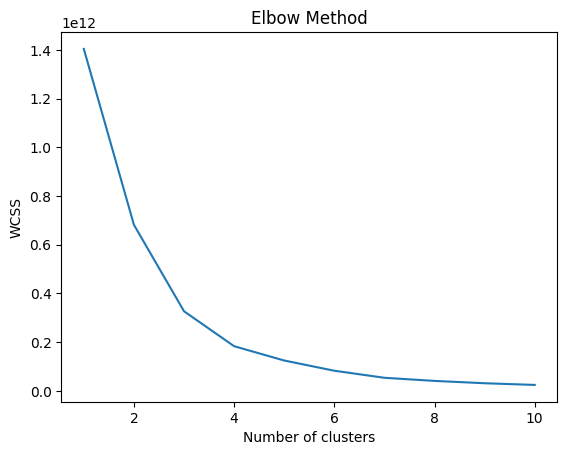

In [ ]:
#ทำการหาจำนวน Cluster ที่เหมาะสมโดยใช้วิธี Elbow Method เพราะ เป็นเทคนิคที่ใช้ในการหาจำนวนกลุ่มที่เหมาะสมในการจัดกลุ่มข้อมูล clustering 
#โดยใช้ค่า WCSS (Within Cluster Sum of Squares) ซึ่งเป็นค่าผลรวมของระยะห่างระหว่างจุดในกลุ่มนั้นๆ เทียบกับจำนวนกลุ่มในวิธีทำ Elbow Method 
wcss = []  #ใช้ในการเลือกจำนวนกลุ่มที่เหมาะสมในการแบ่งกลุ่มโดยดูจากค่าที่  โดยจะเลือกจำนวนกลุ่มที่ทำให้ wcss มีค่าน้อยที่สุดเท่าที่เป็นไปได้
for i in range(1, 11):  #เพราะต้องการแบ่งกลุ่มข้อมูลที่จะทำการทดสอบจำนวน 10 กลุ่ม 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df) 

    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS') 
plt.show() 

###แบ่งคอลัมน์ 'Income', 'Mnt Fish Products', 'Mnt Meat Products' และ 'Mnt Sweet Products' ออกเป็น 3 กลุ่ม

( Dividend volume for 'Income', 'Mnt Fish Products', 'Mnt Meat Products' and 'Mnt Sweet Products' into 3 groups.)



Cluster 1 income range: 57553.91-83275.10
Cluster 2 income range: 23727.56-46337.26
Cluster 3 income range: 666666.00-666666.00


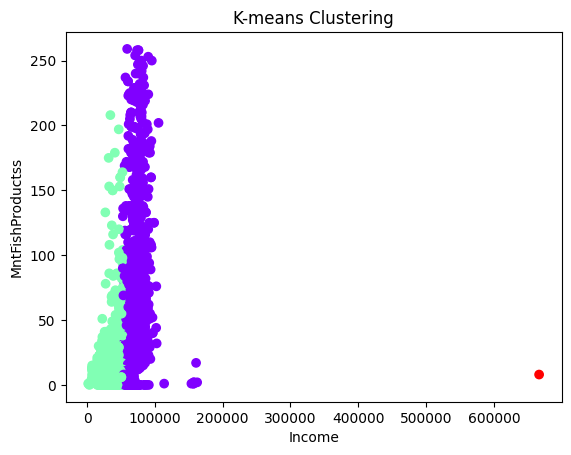

Cluster 1 income range: 57553.91-83275.10
Cluster 2 income range: 23727.56-46337.26
Cluster 3 income range: 666666.00-666666.00


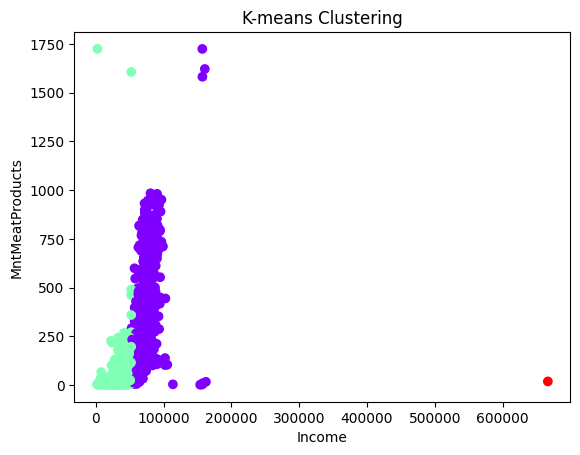

Cluster 1 income range: 57553.91-83275.10
Cluster 2 income range: 23727.56-46337.26
Cluster 3 income range: 666666.00-666666.00


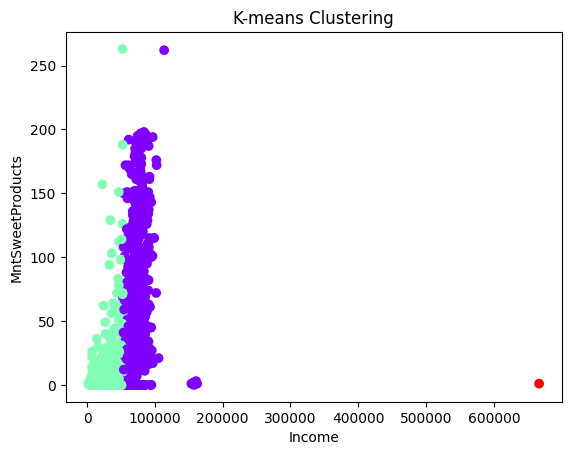

In [ ]:
# แบ่งกลุ่มออกเป็น 3 กลุ่ม
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42) 
kmeans.fit(df) 

# วนลูปกลุ่ม cluster
df_means = pd.DataFrame(columns=['Income', 'MntFishProducts', 'MntMeatProducts', 'MntSweetProducts'])
for i in range(3):
    df_means.loc[i] = df[kmeans.labels_ == i].mean() #.loc[i] ใช้เพื่อเข้าถึงแถวของ DataFrame df_means

# วนลูปเพื่อหา ช่วงรายได้สำหรับแต่ละคลัสเตอร์
for i in range(3):
    print("Cluster {} income range: {:.2f}-{:.2f}".format(i+1, df_means.loc[i, 'Income']-np.std(df[kmeans.labels_ == i]['Income']), df_means.loc[i, 'Income']+np.std(df[kmeans.labels_ == i]['Income'])))


#แสดงกราฟการแบ่งกลุ่มที่ลูกค้ารายได้ของลูกค้า กับ จำนวนเงินที่ใช้สำหรับซื้อสินค้าปลาในช่วง 2 ปีที่ผ่านมา
plt.scatter(df['Income'], df['MntFishProducts'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('MntFishProductss')
plt.title('K-means Clustering')
plt.show()

#แสดงกราฟการแบ่งกลุ่มที่ลูกค้า รายได้ของลูกค้า กับ จำนวนเงินที่ใช้สำหรับซื้อสินค้าเนื้อในช่วง 2 ปีที่ผ่านมา
for i in range(3):
    print("Cluster {} income range: {:.2f}-{:.2f}".format(i+1, df_means.loc[i, 'Income']-np.std(df[kmeans.labels_ == i]['Income']), df_means.loc[i, 'Income']+np.std(df[kmeans.labels_ == i]['Income'])))

plt.scatter(df['Income'], df['MntMeatProducts'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('MntMeatProducts')
plt.title('K-means Clustering')
plt.show()

#แสดงกราฟการแบ่งกลุ่มที่ลูกค้ารายได้ของลูกค้า กับ จำนวนเงินที่ใช้สำหรับซื้อสินค้าของหวานในช่วง 2 ปีที่ผ่านมา

for i in range(3):
    print("Cluster {} income range: {:.2f}-{:.2f}".format(i+1, df_means.loc[i, 'Income']-np.std(df[kmeans.labels_ == i]['Income']), df_means.loc[i, 'Income']+np.std(df[kmeans.labels_ == i]['Income'])))

plt.scatter(df['Income'], df['MntSweetProducts'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('MntSweetProducts')
plt.title('K-means Clustering')
plt.show()

###อธิบายผลลัพธ์ (Explain Results)

- กลุ่มที่ 1 มีรายได้เฉลี่ยต่ำที่สุดอยู่ที่ประมาณ 23,727.56 ถึง 46,337.26  ดอลลาร์ และมียอดซื้อสินค้าประเภทเนื้อสัตว์สูงสุด รองลงเป็นขนมหวาน และน้อยที่สุดเป็น ปลา โดยจัดกลยุทธ์ทางการตลาดดังนี้ ให้ส่วนลดพิเศษหรือโปรโมชั่นเมื่อซื้อครั้งแรก เพื่อดึงดูดให้มาซื้อสินค้า
สร้างสินค้าที่มีราคาถูกและคุณภาพดีเพื่อเป็นตัวเลือกสำหรับลูกค้าในกลุ่มนี้

- กลุ่มที่ 2 มีรายได้เฉลี่ยระหว่าง 57,553.91 ถึง 83,275.10 ดอลลาร์ และมียอดซื้อสินค้าประเภทเนื้อสัตว์สูงสุด รองลงมาเป็น ปลาและขนมหวาน โดยจัดกลยุทธ์ทางการตลาดดังนี้ ให้ส่วนลดพิเศษหรือโปรโมชั่นเมื่อซื้อสินค้าจำนวนมาก โดยเน้นไปที่สินค้าที่เคยซื้อมาก่อนเพื่อให้เกิดความพึงพอใจและติดต่อซื้อสินค้าอีก
ส่งเสริมการสั่งซื้อออนไลน์โดยมีโปรโมชั่นพิเศษสำหรับการสั่งซื้อทางออนไลน์


- กลุ่มที่ 3 มีรายได้เฉลี่ยสูงที่สุดอยู่ที่ประมาณ  666666.00 ดอลลาร์  ขึ้นไป โดยจัดกลยุทธ์ทางการตลาดดังนี้ สร้างแพ็กเกจสินค้าสำหรับลูกค้าที่มีราคาถูกและคุณภาพดี เพื่อตอบสนองความต้องการของกลุ่มนี้ ให้ส่วนลดพิเศษหรือโปรโมชั่นเมื่อซื้อสินค้าในปริมาณมาก

###(Explain Results)
- Group 1 has the lowest average income of approximately $23,727.56 to $46,337.26 and has the highest purchase of meat products. followed by sweets and the least is fish by arranging the following marketing strategies. Offer a special discount or promotion on your first purchase. to attract them to buy products
Create products that are cheap and of good quality to be the choice for this group of customers.

- Group 2 had an average income between $57,553.91 and $83,275.10 and had the highest purchases of meat products, followed by fish and sweets. By organizing marketing strategies as follows Provide special discounts or promotions when purchasing in bulk. By focusing on products that have been bought before to create satisfaction and contact to buy products again.
Promote online purchases with special promotions for online purchases.


- Group 3 has the highest average income, approximately $ 666666.00 or more, with the following marketing strategies Create product packages for customers with low prices and good quality. to meet the needs of this group Offer special discounts or promotions when purchasing large quantities.